# Lab9.Employees Hopping prediction using Random Forests

### STEP -1 UNDERSTAND DATA

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('Employee_hopping.csv')

**Properties**

In [3]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [4]:
df.shape

(1470, 35)

In [5]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [6]:
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [8]:
df['JobRole'].value_counts()

Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: JobRole, dtype: int64

### STEP -2 EXTRACT X AND Y

In [9]:
X = df.drop(['Attrition'],axis=1)
y = df['Attrition']

In [10]:
y = y.apply(lambda x:1 if x == 'Yes' else 0)


In [11]:
X


,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,...,1,80,0,8,0,1,6,4,0,5
1,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,...,4,80,1,10,3,3,10,7,1,7
2,37,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,...,2,80,0,7,3,3,0,0,0,0
3,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,...,3,80,0,8,3,3,8,7,3,0
4,27,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,3,...,3,80,1,17,3,3,5,2,0,3
1466,39,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,4,...,1,80,1,9,5,3,7,7,1,7
1467,27,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,2,...,2,80,1,6,0,3,6,2,0,3
1468,49,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,4,...,4,80,0,17,3,2,9,6,0,8


In [12]:
y

0       1
1       0
2       1
3       0
4       0
       ..
1465    0
1466    0
1467    0
1468    0
1469    0
Name: Attrition, Length: 1470, dtype: int64

### STEP - 3 FEATURE ENGINEERING

In [13]:
df = pd.get_dummies(df,columns=['BusinessTravel','Department','EducationField','Gender','JobRole','MaritalStatus','Over18','OverTime'])

In [14]:
df

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,...,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Over18_Y,OverTime_No,OverTime_Yes
0,41,Yes,1102,1,2,1,1,2,94,3,...,0,0,1,0,0,0,1,1,0,1
1,49,No,279,8,1,1,2,3,61,2,...,0,1,0,0,0,1,0,1,1,0
2,37,Yes,1373,2,2,1,4,4,92,2,...,0,0,0,0,0,0,1,1,0,1
3,33,No,1392,3,4,1,5,4,56,3,...,0,1,0,0,0,1,0,1,0,1
4,27,No,591,2,1,1,7,1,40,3,...,0,0,0,0,0,1,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,884,23,2,1,2061,3,41,4,...,0,0,0,0,0,1,0,1,1,0
1466,39,No,613,6,1,1,2062,4,42,2,...,0,0,0,0,0,1,0,1,1,0
1467,27,No,155,4,3,1,2064,2,87,4,...,0,0,0,0,0,1,0,1,0,1
1468,49,No,1023,2,3,1,2065,4,63,2,...,0,0,1,0,0,1,0,1,1,0


### STEP - 4 CHECK SHAPE OF X AND Y

In [15]:
X = df.drop(['Attrition'],axis=1)
print('X Shape : ',X.shape)
print('y Shape : ',y.shape)


X Shape :  (1470, 55)
y Shape :  (1470,)


### STEP- 5:MODEL DEVELOPMENT

In [16]:
import warnings
warnings.filterwarnings('ignore')

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size =0.2, random_state =42)

In [18]:
from sklearn.ensemble import RandomForestClassifier
RFC = RandomForestClassifier(n_estimators=100, max_features=0.3)

In [19]:
RFC.fit(X_train,y_train)

RandomForestClassifier(max_features=0.3)

In [20]:
RFC_y_pred = RFC.predict(X_test)
RFC_y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

### STEP- 6 TESTING

In [21]:
from sklearn.metrics import accuracy_score,classification_report

In [22]:
RFC_acc = accuracy_score(y_test,RFC_y_pred)
RFC_acc

0.8673469387755102

In [23]:
print(classification_report(y_test, RFC_y_pred))

              precision    recall  f1-score   support

           0       0.88      0.98      0.93       255
           1       0.50      0.13      0.20        39

    accuracy                           0.87       294
   macro avg       0.69      0.55      0.57       294
weighted avg       0.83      0.87      0.83       294



#### STEP- 7 FEATURE IMPORTANT VALUE

In [24]:
print(RFC.feature_importances_)

[0.05308646 0.0544367  0.03893708 0.01663366 0.         0.04467903
 0.02394719 0.03832631 0.02019198 0.02196062 0.02208439 0.08510127
 0.0391604  0.0339277  0.02483824 0.00307253 0.0156238  0.
 0.02895246 0.05015789 0.02219657 0.01889539 0.03917879 0.02171407
 0.02418389 0.0247456  0.00308117 0.0125277  0.00562404 0.0018132
 0.00747625 0.0088429  0.0021976  0.00477119 0.00527688 0.00523534
 0.00262009 0.00806769 0.00549075 0.00499592 0.00158703 0.00196131
 0.00674446 0.00079362 0.0025746  0.00081123 0.00743984 0.00762064
 0.00661197 0.00611332 0.00461074 0.01920288 0.         0.04498906
 0.04488657]


In [25]:
feature_name = pd.DataFrame(RFC.feature_importances_, index=X_train.columns, columns=['Important_Feature'])
feature_name

,Important_Feature
Age,0.053086
DailyRate,0.054437
DistanceFromHome,0.038937
Education,0.016634
EmployeeCount,0.000000
EmployeeNumber,0.044679
EnvironmentSatisfaction,0.023947
HourlyRate,0.038326
JobInvolvement,0.020192
JobLevel,0.021961


In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: >

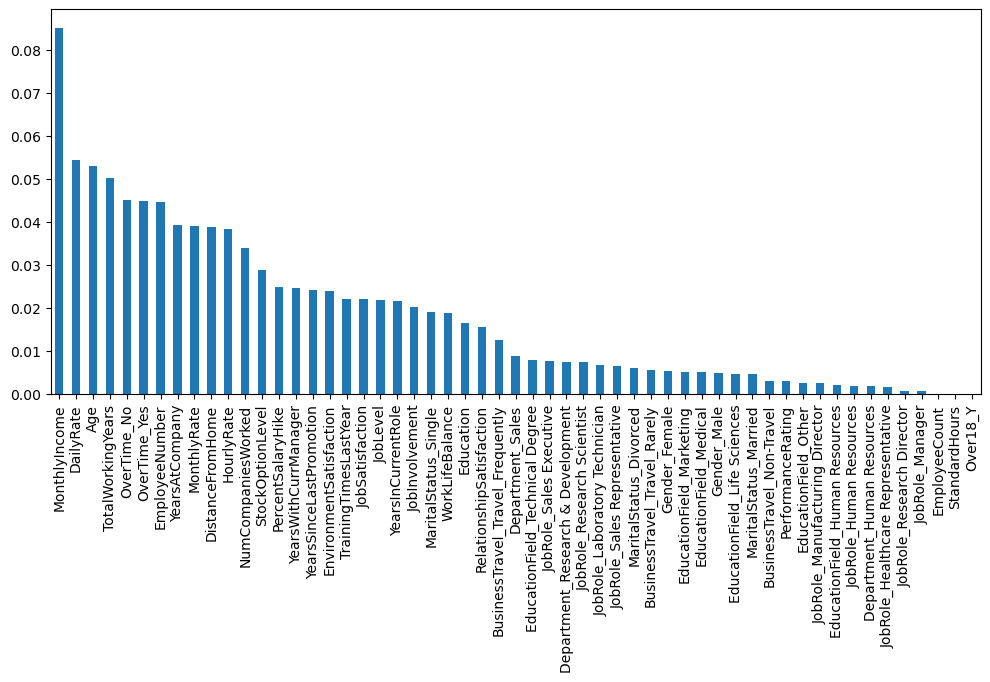

In [27]:
pd.Series(RFC.feature_importances_, index=X_train.columns).sort_values(ascending=False).plot(kind='bar', figsize=(12,5))

### STEP- 8 Visualize your RF Decision Tree using graphviz

In [28]:
estimator = RFC.estimators_[5]

In [29]:
from sklearn import tree 
from sklearn.tree import export_graphviz
with open("RFDT.dot", 'w') as f:
    f = tree.export_graphviz(estimator, out_file=f, max_depth=4, impurity=False, feature_names=X_train.columns)

In [44]:
!dot - Tpng RFDT.dot -o RFDT.png

'dot' is not recognized as an internal or external command,
operable program or batch file.


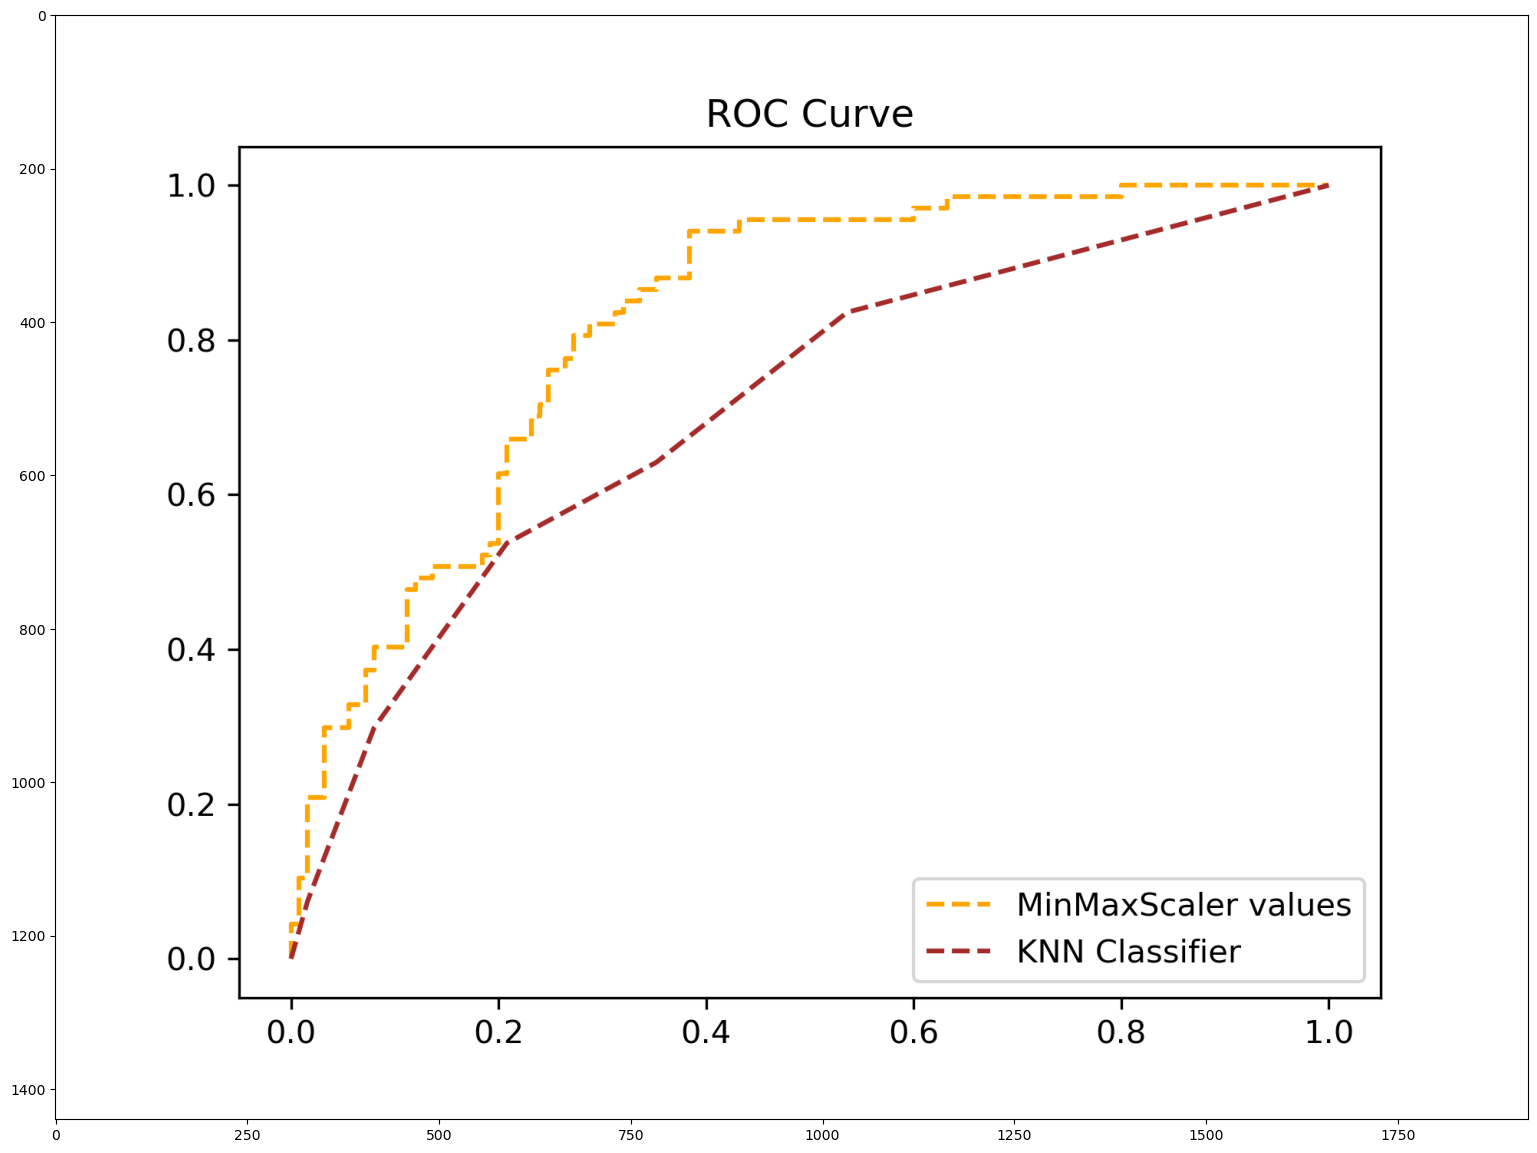

In [45]:
import matplotlib.pyplot as plt 
image = plt.imread('RFDT.png')
plt.figure(figsize=(19,15))
plt.imshow(image)

### STEP- 9:RF WITH A RANGE OF TREES

In [32]:
import warnings 
warnings.filterwarnings('ignore')

In [33]:
rf2 = RandomForestClassifier(oob_score=True, random_state=42, warm_start=True, n_jobs=-1)
oob_list = list()
for n_trees in [15, 20, 30, 40, 50, 100, 150, 200, 300, 400]:
    rf2.set_params(n_estimators=n_trees)
    rf2.fit(X_train, y_train)
    oob_error = 1 - rf2.oob_score_
    oob_list.append(pd.Series({'n_trees': n_trees, 'oob': oob_error}))

rf_oob_df = pd.concat(oob_list, axis=1).T.set_index('n_trees')
rf_oob_df

,oob
n_trees,
15.0,0.163265
20.0,0.159014
30.0,0.148810
40.0,0.144558
50.0,0.139456
100.0,0.140306
150.0,0.138605
200.0,0.140306
300.0,0.137755


### STEP- 10 PLOT OOB -ERROR FOR EACH TREE

The following lines will help you 

[Text(0, 0.5, 'out-of-bag error')]

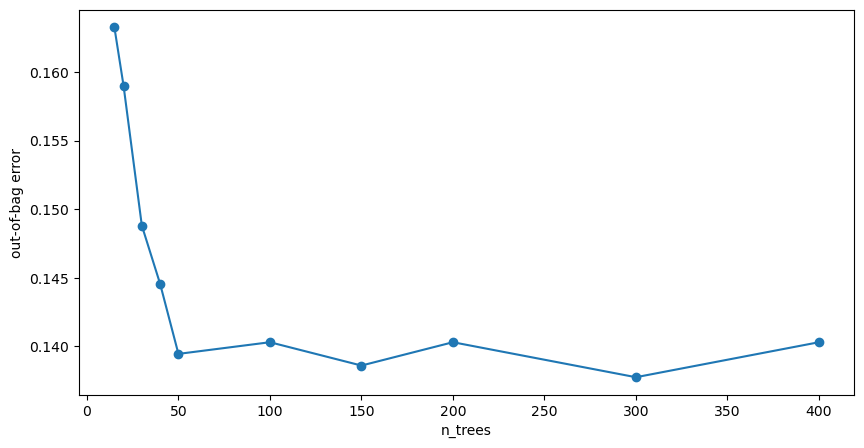

In [34]:
ax = rf_oob_df.plot(legend=False, marker='o', figsize=(10,5))
ax.set(ylabel='out-of-bag error')

### STEP- 11 COMPARE WITH DECISION TREE CLASSIFIER

Create DecisionTreeClassifier, fit and predict on test set

Visualize the tree using graphviz 

Print accuracy score 

Print classification report

What is the result of the comparision between RF and DT models? Which gives best accuracy?.

What is your comment on precision, recall, f1 score values?

In [35]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score,classification_report
clf = DecisionTreeClassifier(max_depth=4, random_state=42)
clf.fit(X_test,y_test)

DecisionTreeClassifier(max_depth=4, random_state=42)

In [36]:
y_pred1 = clf.predict(X_test)
y_pred1

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [37]:
from sklearn import tree 
from sklearn.tree import export_graphviz
with open("DTC2.dot", 'w') as f:
    f = tree.export_graphviz(clf,out_file=f,max_depth = 4,impurity = False,feature_names = X_train.columns.values)

Now open treedtc.dot file which will be created in your working directory then Copy and paste the code to
http://webgraphviz.com/

In [46]:
!dot -Tpng DTC2.dot -o DTC2.png

'dot' is not recognized as an internal or external command,
operable program or batch file.


In [47]:
image = plt.imread('DTC2.png')
plt.figure(figsize=(19,15))
plt.imshow(image)

FileNotFoundError: [Errno 2] No such file or directory: 'DTC2.png'

In [40]:
print("Accuracy of test :",clf.score(X_test,y_test))

Accuracy of test : 0.9183673469387755


In [41]:
print(classification_report(y_test,RFC_y_pred))

              precision    recall  f1-score   support

           0       0.88      0.98      0.93       255
           1       0.50      0.13      0.20        39

    accuracy                           0.87       294
   macro avg       0.69      0.55      0.57       294
weighted avg       0.83      0.87      0.83       294



In [42]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, roc_auc_score, classification_report,f1_score

In [43]:
print("RF model :",accuracy_score(y_test,RFC_y_pred))
print("RF Precision:",precision_score(y_test,RFC_y_pred))
print("RF Recall :",recall_score(y_test,RFC_y_pred))
print("RF F1 score :",f1_score(y_test,RFC_y_pred))
print("\n")
print("DT model :",accuracy_score(y_test,y_pred1))
print("DT Precision:",precision_score(y_test,y_pred1))
print("DT Recall :",recall_score(y_test,y_pred1))
print("DT F1 score :",f1_score(y_test,y_pred1))

RF model : 0.8673469387755102
RF Precision: 0.5
RF Recall : 0.1282051282051282
RF F1 score : 0.2040816326530612


DT model : 0.9183673469387755
DT Precision: 1.0
DT Recall : 0.38461538461538464
DT F1 score : 0.5555555555555556
